In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


In [2]:
df = pd.read_csv('baseball.csv')

In [3]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
df.shape

(30, 17)

In [5]:
df.index

RangeIndex(start=0, stop=30, step=1)

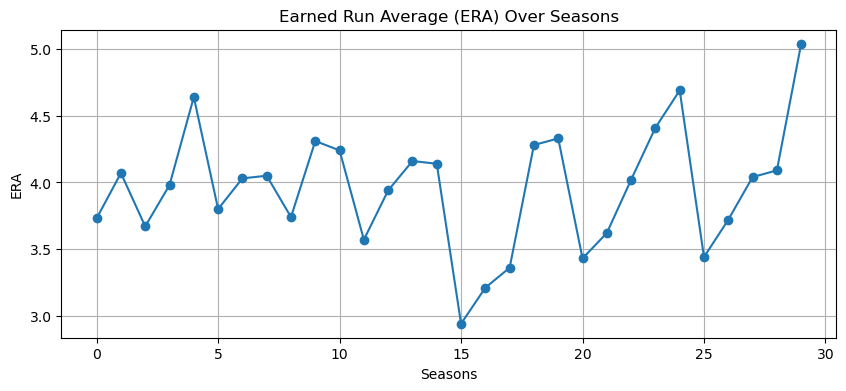

In [6]:
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['ERA'], marker = 'o')
plt.title('Earned Run Average (ERA) Over Seasons')
plt.xlabel('Seasons')
plt.ylabel('ERA')
plt.grid(True)
plt.show()

* This plot can help in understanding the trend of the pitcher's performance in terms of ERA across different seasons.

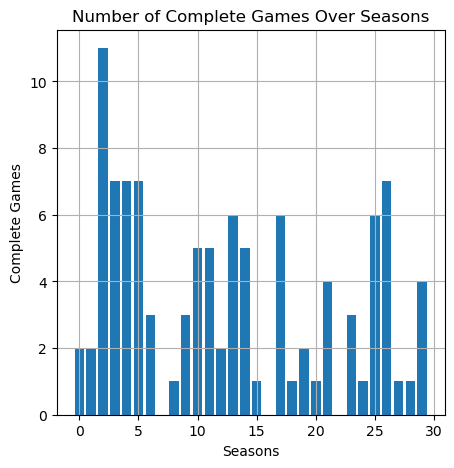

In [7]:
plt.figure(figsize=(5,5))
plt.bar(df.index, df['CG'])
plt.title('Number of Complete Games Over Seasons')
plt.xlabel('Seasons')
plt.ylabel('Complete Games')
plt.grid(True)
plt.show()

* This plot can provide insights into the consistency of complete games pitched by the player across different seasons.

<Axes: >

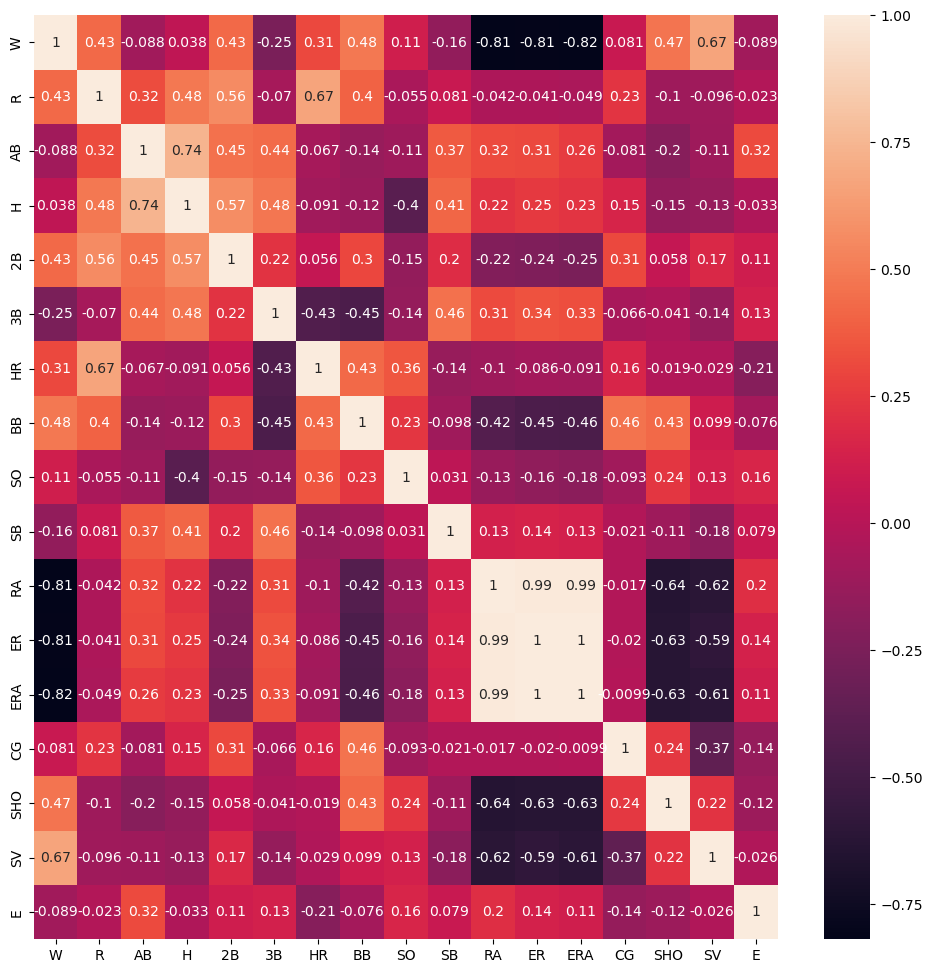

In [8]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(), annot = True)

In [9]:
df = df.drop('RA', axis = 1)

In [10]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [11]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

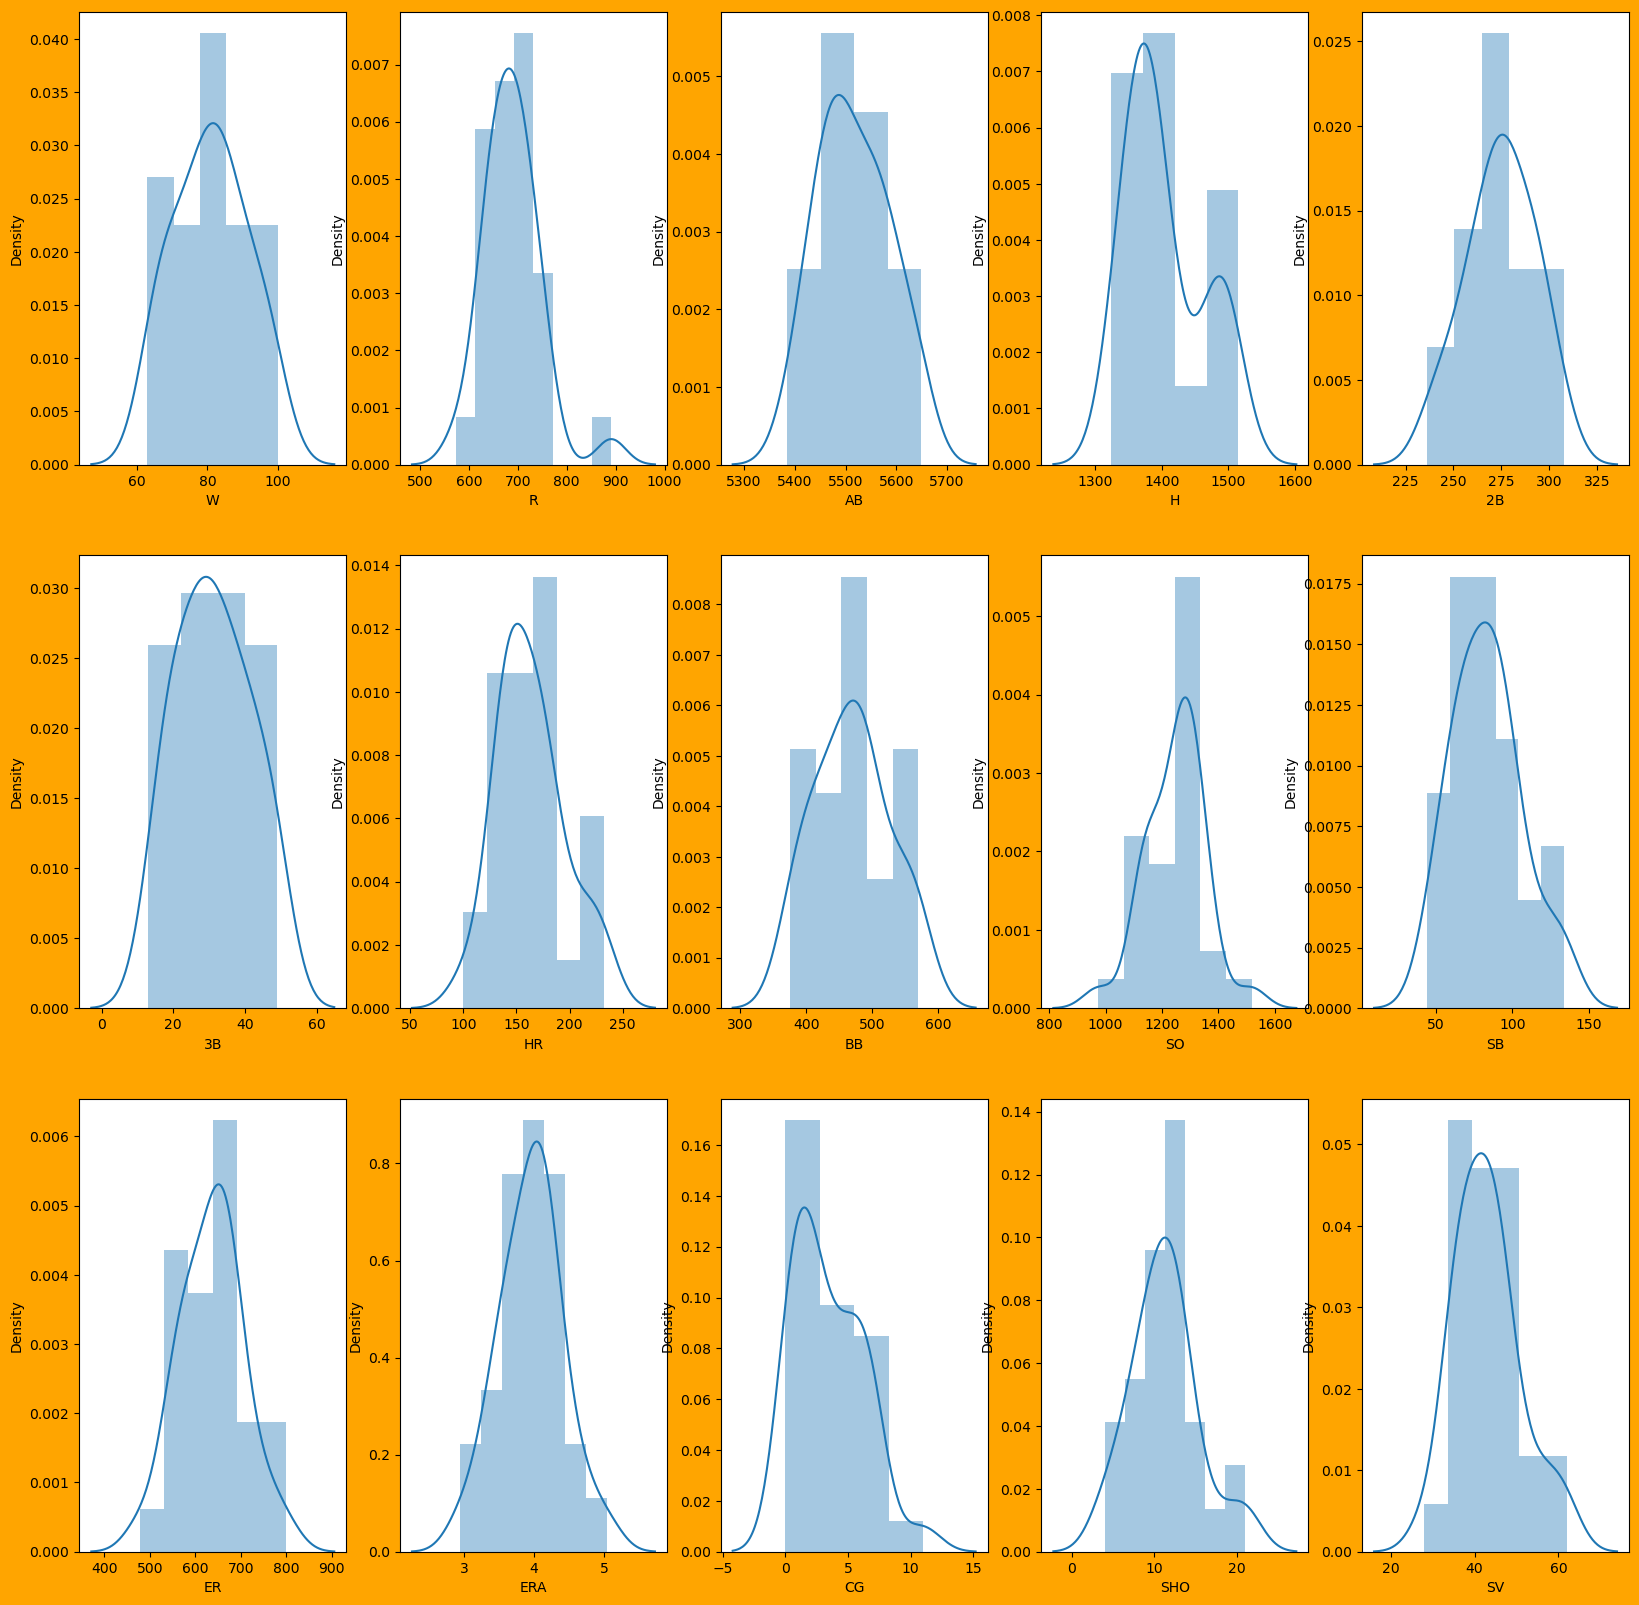

In [12]:
plt.figure(figsize=(20, 20), facecolor="orange")
plots = 1

for i in df.columns:  
    if plots <= 15:
        ax = plt.subplot(3, 5, plots)
        sns.distplot(df[i])
        plt.xlabel(i)
        plots += 1

plt.show()


* from the above plots i observed that it data is ditributed normally, and skewness is very low

In [13]:
x= df.drop('W', axis = 1)
y = df['W']

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc = StandardScaler()
x_sc = sc.fit_transform(x)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x_sc,y , test_size = 0.30, random_state = 163)

regressor = [     LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),
             AdaBoostRegressor(),GradientBoostingRegressor(),SVR(),KNeighborsRegressor()]

In [18]:
def metric_score(rg, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_score = rg.predict(x_train)
        result_type = "train"
    else:
        y_score = rg.predict(x_test)
        result_type = "test"

    mse = mean_squared_error(y_train if train else y_test, y_score)
    r2 = r2_score(y_train if train else y_test, y_score) * 100
    
    print(f'\n ============ {result_type} result ==========')
    print(f'{result_type} R2 score: {r2:.2f}%')
    print(f'{result_type}  MSE : {mse:.4f}')


In [19]:
for rg in regressor:
    print(f'\n================== {rg.__class__.__name__} ==================')
    rg.fit(x_train, y_train)
    metric_score(rg, x_train, x_test, y_train, y_test, train=True)
    metric_score(rg, x_train, x_test, y_train, y_test, train=False)
    


================== LinearRegression ==================

 ============ train result ==========
train R2 score: 96.04%
train  MSE : 4.9813

 ============ test result ==========
test R2 score: 73.25%
test  MSE : 15.4549

================== DecisionTreeRegressor ==================

 ============ train result ==========
train R2 score: 100.00%
train  MSE : 0.0000

 ============ test result ==========
test R2 score: -49.62%
test  MSE : 86.4444

================== RandomForestRegressor ==================

 ============ train result ==========
train R2 score: 90.20%
train  MSE : 12.3271

 ============ test result ==========
test R2 score: 86.07%
test  MSE : 8.0487

================== AdaBoostRegressor ==================

 ============ train result ==========
train R2 score: 98.91%
train  MSE : 1.3754

 ============ test result ==========
test R2 score: 66.14%
test  MSE : 19.5612

================== GradientBoostingRegressor ==================

 ============ train result ==========
train R2 sc

In [20]:
for rg in regressor:
    cv = cross_val_score(rg, x_sc, y, cv = 5)
    print('===========',rg, '==============')
    print('cv mean' ,cv.mean())
    a = rg.predict(x_test)
    print('diff between r2 score and cv score', (r2_score(y_test, a ) - cv.mean() ))

=========== LinearRegression() ==============
cv mean 0.4162965696704048
diff between r2 score and cv score 0.31621543676364333
=========== DecisionTreeRegressor() ==============
cv mean -2.048327364803002
diff between r2 score and cv score 1.5521735186491563
=========== RandomForestRegressor() ==============
cv mean -0.5731423283921891
diff between r2 score and cv score 1.4338371360844968
=========== AdaBoostRegressor() ==============
cv mean -0.7955076288736016
diff between r2 score and cv score 1.4569483667071967
=========== GradientBoostingRegressor() ==============
cv mean -0.973388032564187
diff between r2 score and cv score 1.5152479107277195
=========== SVR() ==============
cv mean -0.3858796672205332
diff between r2 score and cv score 0.5628092117042076
=========== KNeighborsRegressor() ==============
cv mean -0.22432597903140858
diff between r2 score and cv score 1.0143259790314085


* from the above observations, i  move with RFC for Hyperparameter tuning

In [34]:
param_grid_rfc = {'n_estimators': [100, 200, 300],'max_depth': [10, 20],'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

In [35]:
grfc = GridSearchCV(RandomForestRegressor(),param_grid_rfc,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
grfc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [36]:
print("Best parameters of rfc", grfc.best_params_)

Best parameters of rfc {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [37]:
final = RandomForestRegressor(max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
final.fit(x_train, y_train)
pred1 = final.predict(x_test)
acc = r2_score(y_test, pred1)
print(acc*100)

89.88665384615386


In [38]:
import joblib
joblib.dump(final, "baseball.pkl" )

['baseball.pkl']